In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv('Life Expectancy Data.csv')
data.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


In [3]:
data.describe(include = 'all')

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
count,2938,2938.000000,2938,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000,2928.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793,69.224932
std,NaN,4.613841,NaN,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920,9.523867
min,NaN,2000.000000,NaN,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,36.300000
25%,NaN,2004.000000,NaN,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000,63.100000
50%,NaN,2008.000000,NaN,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000,72.100000
75%,NaN,2012.000000,NaN,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000,75.700000


In [4]:
data.shape

(2938, 22)

In [5]:
data.count()

Country                            2938
Year                               2938
Status                             2938
Adult Mortality                    2928
infant deaths                      2938
Alcohol                            2744
percentage expenditure             2938
Hepatitis B                        2385
Measles                            2938
 BMI                               2904
under-five deaths                  2938
Polio                              2919
Total expenditure                  2712
Diphtheria                         2919
 HIV/AIDS                          2938
GDP                                2490
Population                         2286
 thinness  1-19 years              2904
 thinness 5-9 years                2904
Income composition of resources    2771
Schooling                          2775
Life expectancy                    2928
dtype: int64

In [6]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Life expectancy                     10
dtype: int64

In [7]:
data['Adult Mortality'].fillna(data['Adult Mortality'].mean(), inplace=True)

In [8]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Adult Mortality                      0
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Life expectancy                     10
dtype: int64

In [9]:
data['Alcohol'].fillna(data['Alcohol'].mean(), inplace=True)

In [10]:
data['Hepatitis B'].fillna(data['Hepatitis B'].mean(), inplace=True)

In [11]:
data.columns

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Life expectancy '],
      dtype='object')

In [12]:
data[' BMI '].fillna(data[' BMI '].mean(), inplace=True)

In [13]:
data['Total expenditure'].fillna(data['Total expenditure'].mean(), inplace=True)
data['Diphtheria '].fillna(data['Diphtheria '].mean(), inplace=True)

In [14]:
data.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


In [15]:
data.describe(include = 'all')

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
count,2938,2938.000000,2938,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2919.000000,2938.000000,2938.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000,2928.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793,69.224932
std,NaN,4.613841,NaN,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.428046,2.400274,23.640073,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920,9.523867
min,NaN,2000.000000,NaN,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,36.300000
25%,NaN,2004.000000,NaN,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000,63.100000
50%,NaN,2008.000000,NaN,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000,72.100000
75%,NaN,2012.000000,NaN,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000,75.700000


In [16]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                               19
Total expenditure                    0
Diphtheria                           0
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Life expectancy                     10
dtype: int64

In [17]:
data.columns

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Life expectancy '],
      dtype='object')

In [18]:
data['Polio'].fillna(data['Polio'].mean(), inplace=True)
data['GDP'].fillna(data['GDP'].mean(), inplace=True)
data[' thinness  1-19 years'].fillna(data[' thinness  1-19 years'].mean(), inplace=True)
data[' thinness 5-9 years'].fillna(data[' thinness 5-9 years'].mean(), inplace=True)
data['Income composition of resources'].fillna(data['Income composition of resources'].mean(), inplace=True)
data['Schooling'].fillna(data['Schooling'].mean(), inplace=True)
data['Life expectancy '].fillna(data['Life expectancy '].mean(), inplace=True)

In [19]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                           0
 HIV/AIDS                            0
GDP                                  0
Population                         652
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income composition of resources      0
Schooling                            0
Life expectancy                      0
dtype: int64

In [20]:
data = data[['Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Life expectancy ']]
data.head()

,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1,65.0
1,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0,59.9
2,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9,59.9
3,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8,59.5
4,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5,59.2


In [21]:
data['Status'].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [23]:
data['Status'] = labelencoder.fit_transform(data['Status'])
data.Status.value_counts()

1    2426
0     512
Name: Status, dtype: int64

In [24]:
data.head()

,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,1,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1,65.0
1,1,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0,59.9
2,1,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9,59.9
3,1,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8,59.5
4,1,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5,59.2


In [25]:
data.corr()

,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
Status,1.000000,0.315171,0.112252,-0.579371,-0.454261,-0.095642,0.076955,-0.310873,0.115195,-0.220098,-0.289985,-0.216763,0.148590,-0.445911,0.367934,0.366297,-0.457302,-0.491444,-0.481962
Adult Mortality,0.315171,1.000000,0.078747,-0.190408,-0.242814,-0.138591,0.031174,-0.381449,0.094135,-0.272694,-0.110875,-0.273014,0.523727,-0.277053,0.299863,0.305366,-0.440062,-0.435108,-0.696359
infant deaths,0.112252,0.078747,1.000000,-0.113812,-0.085612,-0.178783,0.501128,-0.227220,0.996629,-0.170674,-0.126564,-0.175156,0.025231,-0.107109,0.465590,0.471228,-0.143663,-0.191757,-0.196535
Alcohol,-0.579371,-0.190408,-0.113812,1.000000,0.339634,0.075447,-0.051055,0.318070,-0.110777,0.213744,0.294898,0.215242,-0.048650,0.318591,-0.416946,-0.405881,0.416099,0.497546,0.391598
percentage expenditure,-0.454261,-0.242814,-0.085612,0.339634,1.000000,0.011679,-0.056596,0.228537,-0.087852,0.147203,0.173414,0.143570,-0.097857,0.888140,-0.251190,-0.252725,0.380374,0.388105,0.381791
Hepatitis B,-0.095642,-0.138591,-0.178783,0.075447,0.011679,1.000000,-0.090317,0.134929,-0.184413,0.408519,0.050084,0.499958,-0.102405,0.062318,-0.105144,-0.108334,0.150992,0.171755,0.203771
Measles,0.076955,0.031174,0.501128,-0.051055,-0.056596,-0.090317,1.000000,-0.175925,0.507809,-0.136146,-0.104569,-0.141861,0.030899,-0.068060,0.224742,0.221007,-0.115764,-0.122609,-0.157574
BMI,-0.310873,-0.381449,-0.227220,0.318070,0.228537,0.134929,-0.175925,1.000000,-0.237586,0.282156,0.231814,0.281059,-0.243548,0.276645,-0.532025,-0.538911,0.479837,0.508105,0.559255
under-five deaths,0.115195,0.094135,0.996629,-0.110777,-0.087852,-0.184413,0.507809,-0.237586,1.000000,-0.188703,-0.128269,-0.195651,0.038062,-0.110640,0.467626,0.472099,-0.161533,-0.207111,-0.222503
Polio,-0.220098,-0.272694,-0.170674,0.213744,0.147203,0.408519,-0.136146,0.282156,-0.188703,1.000000,0.130129,0.673553,-0.159489,0.193980,-0.219938,-0.220710,0.355398,0.385832,0.461574


In [26]:
data.columns

Index(['Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Life expectancy '],
      dtype='object')

In [27]:
data = data[['Status', 'Adult Mortality', ' BMI ', 'Polio', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', ' thinness  1-19 years',' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Life expectancy ']]

In [28]:
data.corr()

,Status,Adult Mortality,BMI,Polio,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
Status,1.000000,0.315171,-0.310873,-0.220098,-0.216763,0.148590,-0.445911,0.367934,0.366297,-0.457302,-0.491444,-0.481962
Adult Mortality,0.315171,1.000000,-0.381449,-0.272694,-0.273014,0.523727,-0.277053,0.299863,0.305366,-0.440062,-0.435108,-0.696359
BMI,-0.310873,-0.381449,1.000000,0.282156,0.281059,-0.243548,0.276645,-0.532025,-0.538911,0.479837,0.508105,0.559255
Polio,-0.220098,-0.272694,0.282156,1.000000,0.673553,-0.159489,0.193980,-0.219938,-0.220710,0.355398,0.385832,0.461574
Diphtheria,-0.216763,-0.273014,0.281059,0.673553,1.000000,-0.164787,0.182795,-0.227820,-0.221105,0.371729,0.389944,0.475418
HIV/AIDS,0.148590,0.523727,-0.243548,-0.159489,-0.164787,1.000000,-0.134514,0.203922,0.207140,-0.247454,-0.218620,-0.556457
GDP,-0.445911,-0.277053,0.276645,0.193980,0.182795,-0.134514,1.000000,-0.267745,-0.272400,0.440317,0.429489,0.430493
thinness 1-19 years,0.367934,0.299863,-0.532025,-0.219938,-0.227820,0.203922,-0.267745,1.000000,0.939102,-0.406662,-0.446140,-0.472162
thinness 5-9 years,0.366297,0.305366,-0.538911,-0.220710,-0.221105,0.207140,-0.272400,0.939102,1.000000,-0.395779,-0.435777,-0.466629
Income composition of resources,-0.457302,-0.440062,0.479837,0.355398,0.371729,-0.247454,0.440317,-0.406662,-0.395779,1.000000,0.796207,0.692483


<AxesSubplot:>

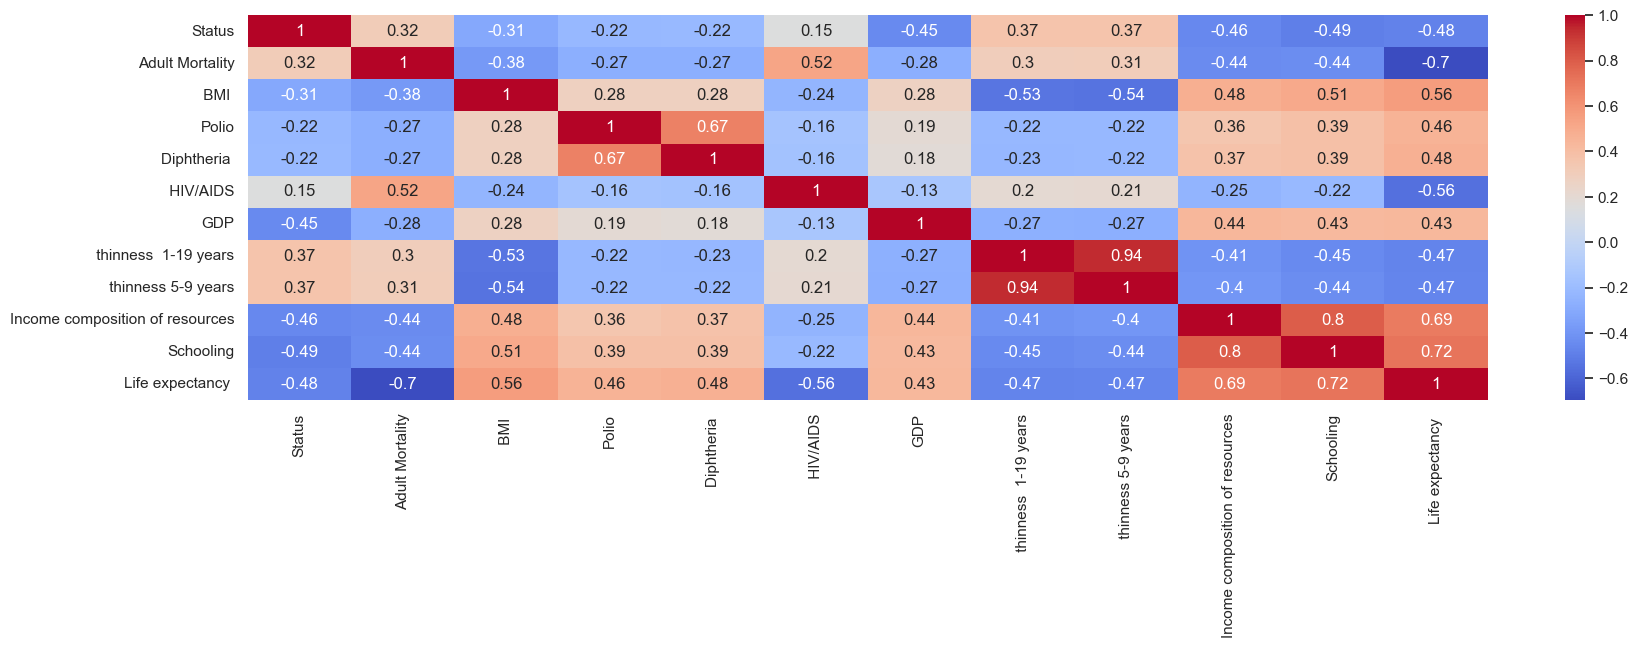

In [29]:
plt.figure(figsize = (20,5))

sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

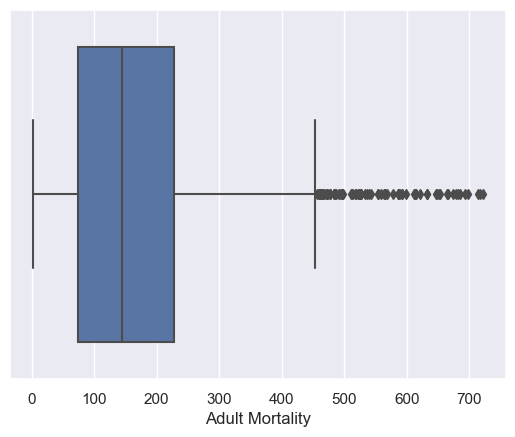

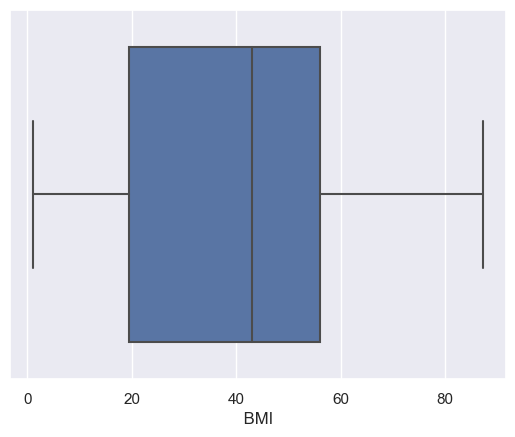

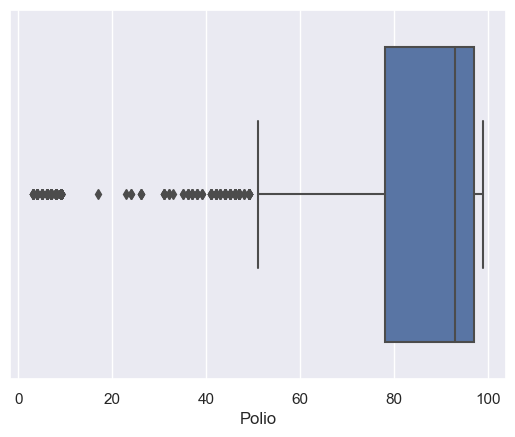

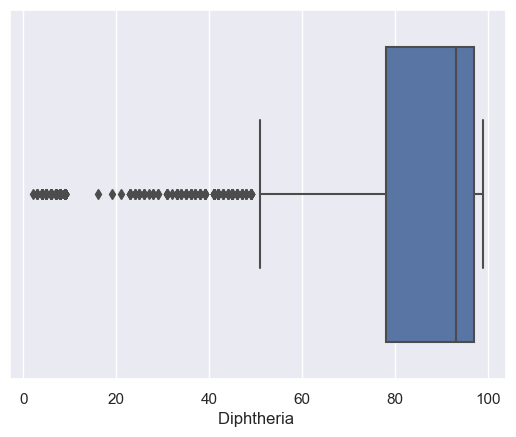

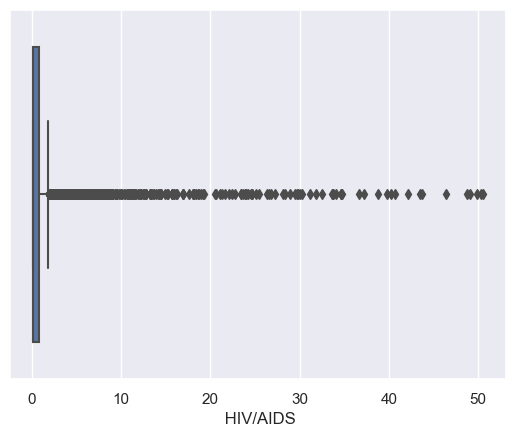

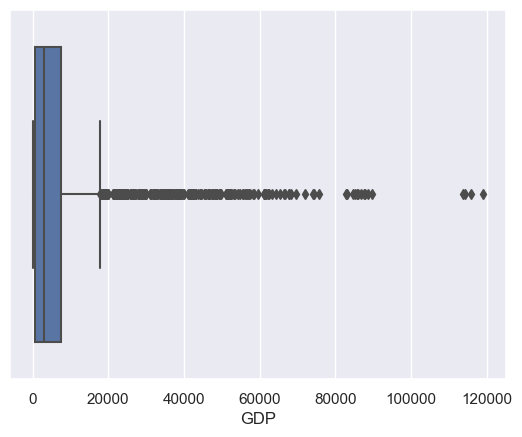

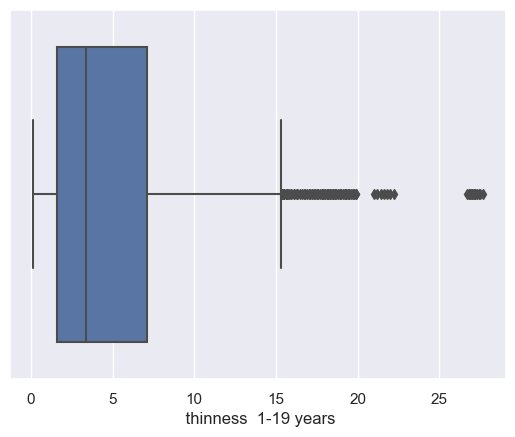

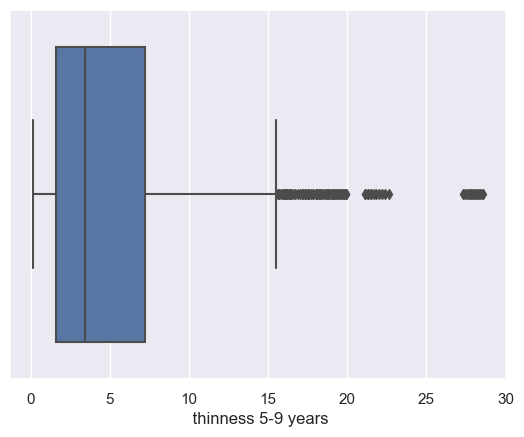

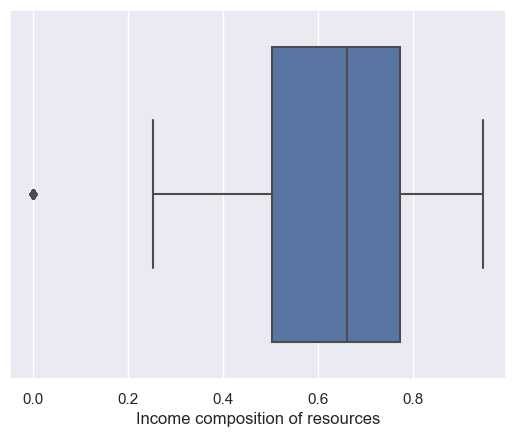

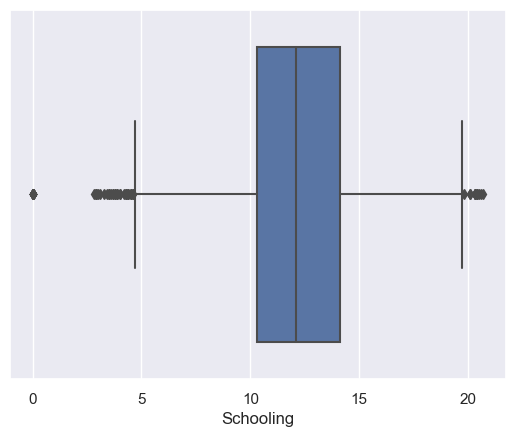

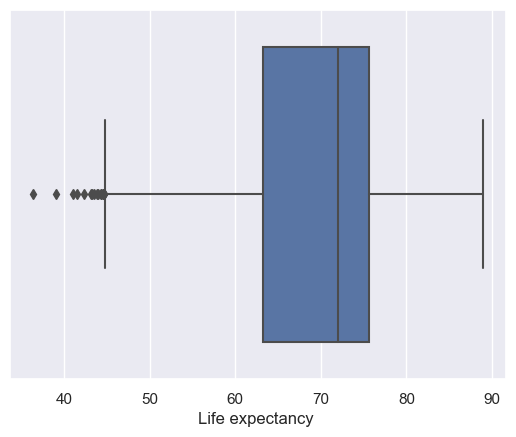

In [30]:
for i in data.iloc[:, 1:]:
    sns.boxplot(data = data, x = data[i])
    plt.show()

In [31]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

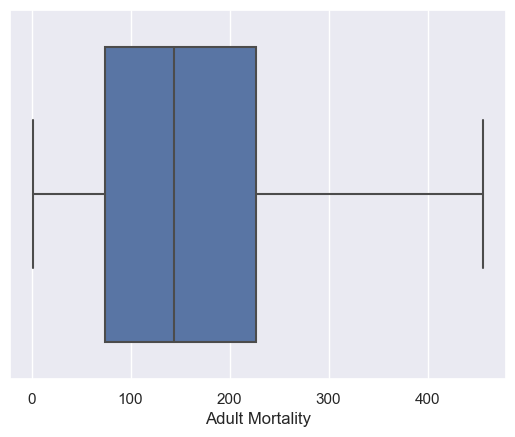

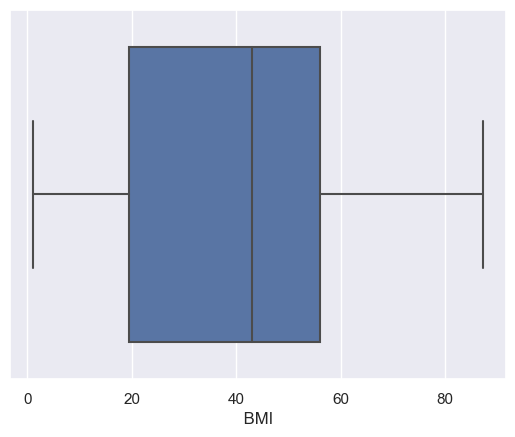

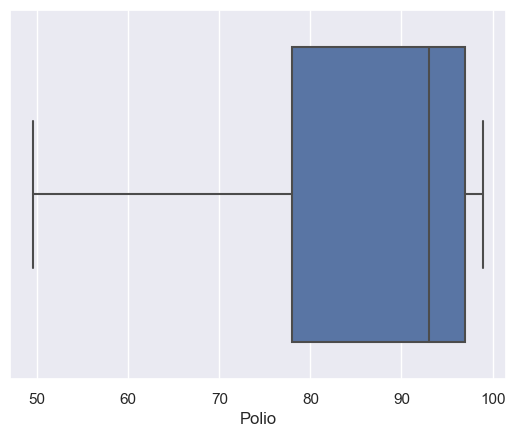

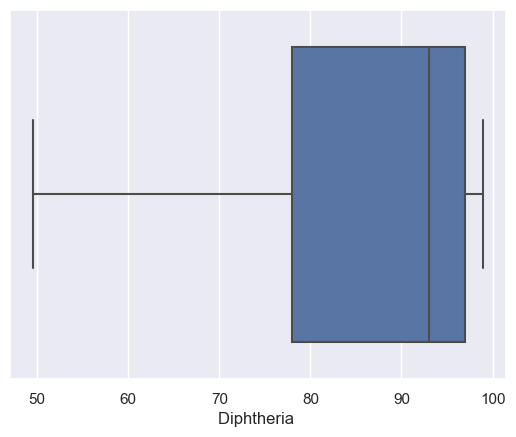

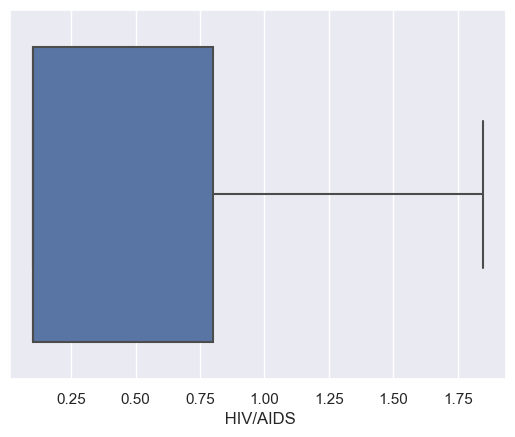

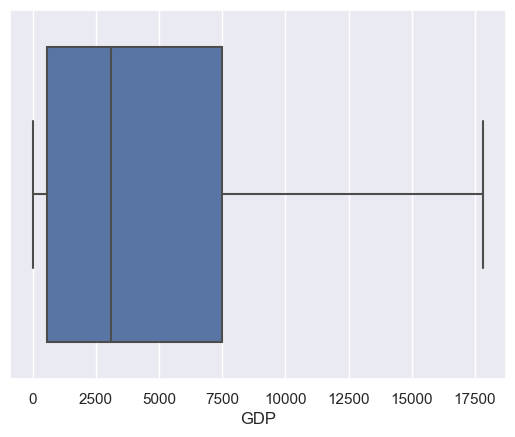

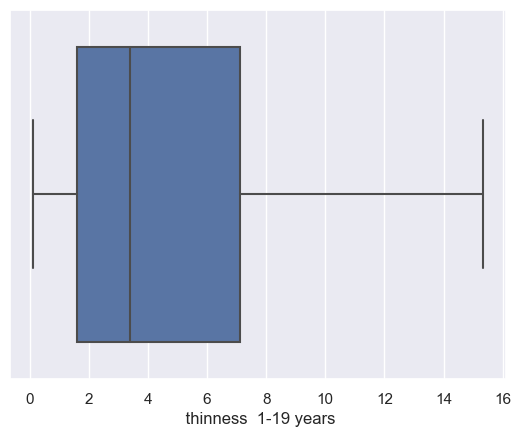

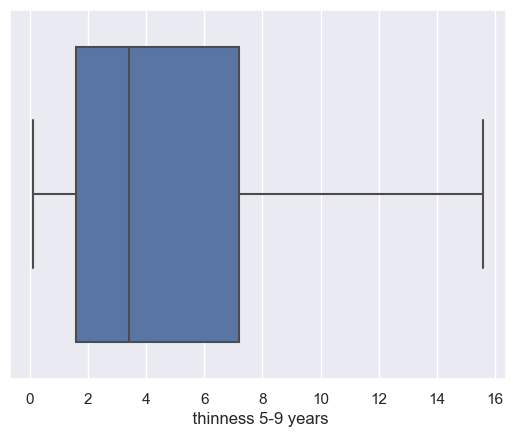

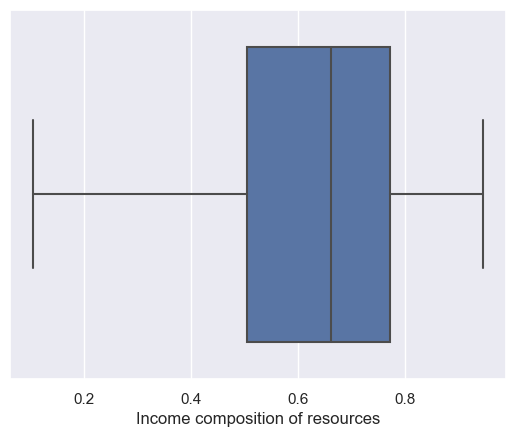

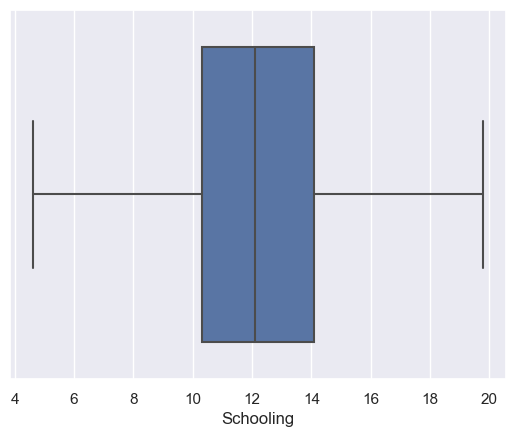

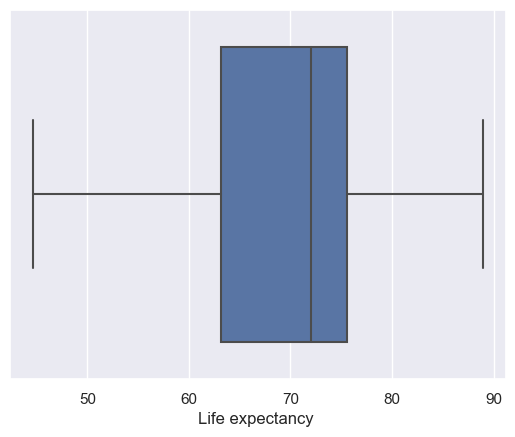

In [32]:
for i in data.iloc[:, 1:]:
    data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
    data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [33]:
data.columns

Index(['Status', 'Adult Mortality', ' BMI ', 'Polio', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Life expectancy '],
      dtype='object')

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data[['Status', 'Adult Mortality', ' BMI ', ' HIV/AIDS', 'GDP']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns
vif

,VIF,Features
0,4.488139,Status
1,4.544546,Adult Mortality
2,3.834789,BMI
3,2.739104,HIV/AIDS
4,2.099235,GDP


In [35]:
data = data[['Status', 'Adult Mortality', ' BMI ', ' HIV/AIDS', 'GDP', 'Life expectancy ']]
data.head()

,Status,Adult Mortality,BMI,HIV/AIDS,GDP,Life expectancy
0,1,263.0,19.1,0.1,584.259210,65.0
1,1,271.0,18.6,0.1,612.696514,59.9
2,1,268.0,18.1,0.1,631.744976,59.9
3,1,272.0,17.6,0.1,669.959000,59.5
4,1,275.0,17.2,0.1,63.537231,59.2


# ---

In [36]:
x = data[['Status', 'Adult Mortality', ' BMI ', ' HIV/AIDS', 'GDP']]
y = data['Life expectancy ']

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state=42)

# Linear regression

In [39]:
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(X_train,y_train)

LinearRegression()

In [40]:
reg.intercept_

69.28222243716144

In [41]:
reg.coef_

array([-1.47154769, -2.41686696,  1.20375654, -4.68986534,  1.31178785])

In [42]:
y_pred = reg.predict(X_test)

In [43]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 3.2237277669198448
MSE is 18.170178270480143
RMSE is 4.262649208002007
R2 score is 0.7899619324107421


In [44]:
df_pf = pd.DataFrame(np.exp(y_pred), columns=['Prediction'])
df_pf.head()

,Prediction
0,2.261603e+31
1,2.287696e+34
2,9.807921e+31
3,2.650198e+34
4,2.348474e+22


In [45]:
y_test = y_test.reset_index(drop=True)

y_test.head()

0    73.7
1    75.9
2    74.2
3    76.8
4    51.9
Name: Life expectancy , dtype: float64

In [46]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,2.261603e+31,1.017427e+32
1,2.287696e+34,9.182294e+32
2,9.807921e+31,1.677454e+32
3,2.650198e+34,2.258480e+33
4,2.348474e+22,3.466439e+22


# Decision tree

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state=42)

In [50]:
reg = DecisionTreeRegressor()

In [51]:
reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [52]:
y_pred = reg.predict(X_test)

In [53]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 2.1159866268911935
MSE is 10.039227328941443
RMSE is 3.1684739747931405
R2 score is 0.8839516114332318


# Random forest

In [54]:
from sklearn.ensemble import RandomForestRegressor
regRF = RandomForestRegressor(n_estimators = 10)

In [55]:
regRF.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10)

In [56]:
y_predRF = regRF.predict(X_test)

In [57]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, y_predRF)
mse = metrics.mean_squared_error(y_test, y_predRF)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_predRF)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 1.7029958873674373
MSE is 6.233259904379576
RMSE is 2.496649736022171
R2 score is 0.9279466692286397


In [58]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)    

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [59]:
rf_random = RandomizedSearchCV(estimator = regRF, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=1, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(n_estimators=10),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=1)

In [60]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70}

In [61]:
optimizedmodel = RandomForestRegressor(n_estimators = 1800, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 90)

In [62]:
optimizedmodel.fit(X_train, y_train)


RandomForestRegressor(max_depth=90, max_features='sqrt', n_estimators=1800)

In [63]:
y_pred = optimizedmodel.predict(X_test)

In [64]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 1.553935950580147
MSE is 4.921100492271456
RMSE is 2.2183553575276114
R2 score is 0.9431145681444143


# SVM

In [65]:
from sklearn import metrics

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_pred)
    print('Model Performance')
    print('Accuracy is', r2*100, '%')
    
    return mae
    return mse
    return rmse
    return r2

In [66]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [67]:
from sklearn.svm import SVR

base_model = SVR()
base_model.fit(x_train, y_train)
base_accuracy = evaluate(base_model, x_test, y_test)

Model Performance
Accuracy is 88.8133860525119 %


In [68]:
from sklearn.model_selection import RandomizedSearchCV

kernel = ['linear', 'poly', 'rbf', 'sigmoid']
# kernel trick

gamma = ['scale', 'auto'] 
#Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

#if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma
#if ‘auto’, uses 1 / n_features.

C = [1, 10, 100, 1e3, 1e4, 1e5, 1e6]
# Must be strictly positive.

epsilon = [0.1 , 0.01, 0.001, 0.0001]


# Create the random grid
random_grid = {'kernel': kernel,
               'gamma': gamma,
               'C': C,
               'epsilon': epsilon}
print(random_grid)

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto'], 'C': [1, 10, 100, 1000.0, 10000.0, 100000.0, 1000000.0], 'epsilon': [0.1, 0.01, 0.001, 0.0001]}


In [69]:
svr_random = RandomizedSearchCV(estimator = base_model, param_distributions = random_grid, n_iter = 3, cv = 3, verbose=1, n_jobs = -1)
# Fit the random search model
svr_random.fit(x_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=3, n_jobs=-1,
                   param_distributions={'C': [1, 10, 100, 1000.0, 10000.0,
                                              100000.0, 1000000.0],
                                        'epsilon': [0.1, 0.01, 0.001, 0.0001],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   verbose=1)

In [70]:
svr_random.best_params_

{'kernel': 'rbf', 'gamma': 'auto', 'epsilon': 0.1, 'C': 10}

In [71]:
optimized_model = svr_random.best_estimator_
optmized_accuracy = evaluate(optimized_model, x_test, y_test)

Model Performance
Accuracy is 90.03935356099795 %


# KNN

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

In [73]:
from sklearn import metrics

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = (metrics.r2_score(y_test, y_pred))*100
    print('Model Performance')
    print('rmse is', rmse)
    print('Accuracy is', r2.round(4), '%')
    
    return rmse
    return r2

In [74]:
from sklearn.neighbors import KNeighborsRegressor

base_model = KNeighborsRegressor()
base_model.fit(X_train, y_train)

KNeighborsRegressor()

In [75]:
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
rmse is 2.702854619520226
Accuracy is 92.1177 %


In [76]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

rmse_val = [] #to store rmse values for different k

for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    y1_pred=model.predict(X_test) #make prediction on test set
    
    error = sqrt(mean_squared_error(y_test,y1_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 2.902354817523619
RMSE value for k=  2 is: 2.719424784083932
RMSE value for k=  3 is: 2.6509193448996213
RMSE value for k=  4 is: 2.697972738624289
RMSE value for k=  5 is: 2.702854619520226
RMSE value for k=  6 is: 2.737977700132292
RMSE value for k=  7 is: 2.7634168281996168
RMSE value for k=  8 is: 2.788494499407201
RMSE value for k=  9 is: 2.808958656397703
RMSE value for k=  10 is: 2.8222309739629745
RMSE value for k=  11 is: 2.83299207944473
RMSE value for k=  12 is: 2.8443186232844697
RMSE value for k=  13 is: 2.8499789729796317
RMSE value for k=  14 is: 2.8574536830517934
RMSE value for k=  15 is: 2.8795978878764767
RMSE value for k=  16 is: 2.9061117397003926
RMSE value for k=  17 is: 2.913123304938057
RMSE value for k=  18 is: 2.929485314962086
RMSE value for k=  19 is: 2.9372550800276733
RMSE value for k=  20 is: 2.951304940380344


In [77]:
rmse_val

[2.902354817523619,
 2.719424784083932,
 2.6509193448996213,
 2.697972738624289,
 2.702854619520226,
 2.737977700132292,
 2.7634168281996168,
 2.788494499407201,
 2.808958656397703,
 2.8222309739629745,
 2.83299207944473,
 2.8443186232844697,
 2.8499789729796317,
 2.8574536830517934,
 2.8795978878764767,
 2.9061117397003926,
 2.913123304938057,
 2.929485314962086,
 2.9372550800276733,
 2.951304940380344]

In [78]:
min_rmse = min(rmse_val)
min_rmse_index = rmse_val.index(min_rmse) + 1


print('Optimal Neighbor is ',min_rmse_index,' min rmse is', min_rmse) 

Optimal Neighbor is  3  min rmse is 2.6509193448996213


In [79]:
min_rmse_model = KNeighborsRegressor(n_neighbors=3)
min_rmse_model.fit(X_train, y_train)
min_rmse_accuracy = evaluate(min_rmse_model, X_test, y_test)

Model Performance
rmse is 2.6509193448996213
Accuracy is 92.4177 %


<AxesSubplot:>

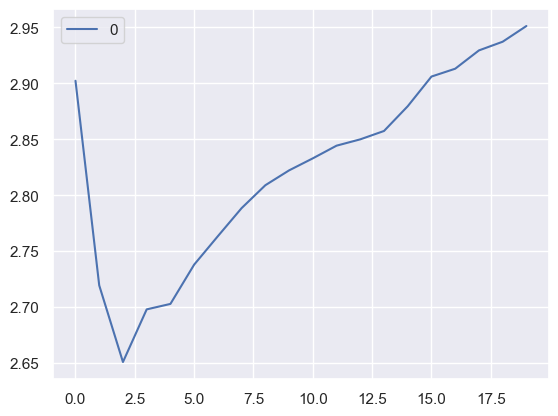

In [80]:
curve = pd.DataFrame(rmse_val)
curve.plot()

In [81]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_


{'n_neighbors': 3}

In [82]:
from sklearn.model_selection import RandomizedSearchCV

neighbors = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)]
weight  = ['uniform','distance']


# Create the random grid
random_grid = {'n_neighbors': neighbors,
               'weights': weight}
print(random_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'weights': ['uniform', 'distance']}


In [83]:
knn_random = RandomizedSearchCV(estimator = base_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=1, n_jobs = -1)
# Fit the random search model
knn_random.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


D:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=KNeighborsRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19,
                                                        20],
                                        'weights': ['uniform', 'distance']},
                   verbose=1)

In [84]:
knn_random.best_params_

{'weights': 'distance', 'n_neighbors': 9}

In [85]:
optimized_model = knn_random.best_estimator_
optmized_accuracy = evaluate(optimized_model, X_test, y_test)

Model Performance
rmse is 2.573838820510765
Accuracy is 92.8523 %


## Modified KNN

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [88]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [89]:
from sklearn import metrics

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = (metrics.r2_score(y_test, y_pred))*100
    print('Model Performance')
    print('rmse is', rmse)
    print('Accuracy is', r2.round(4), '%')
    
    return rmse
    return r2

In [90]:
from sklearn.neighbors import KNeighborsRegressor

base_model = KNeighborsRegressor()
base_model.fit(x_train, y_train)
base_accuracy = evaluate(base_model, x_test, y_test)

Model Performance
rmse is 2.614414242226952
Accuracy is 92.0989 %


In [91]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

rmse_val = [] #to store rmse values for different k

for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    y1_pred=model.predict(x_test) #make prediction on test set
    
    error = sqrt(mean_squared_error(y_test,y1_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    
    print('RMSE value for k= ' , K , 'is:', error)
    

min_rmse = min(rmse_val)
min_rmse_index = rmse_val.index(min_rmse) + 1


print('Optimal Neighbor is ',min_rmse_index,' min rmse is', min_rmse) 

RMSE value for k=  1 is: 2.95092225869655
RMSE value for k=  2 is: 2.6017353415477853
RMSE value for k=  3 is: 2.5066649766167797
RMSE value for k=  4 is: 2.590729120603347
RMSE value for k=  5 is: 2.614414242226952
RMSE value for k=  6 is: 2.6333299663984575
RMSE value for k=  7 is: 2.6921791735354565
RMSE value for k=  8 is: 2.706000129453614
RMSE value for k=  9 is: 2.736687909727696
RMSE value for k=  10 is: 2.773042721295799
RMSE value for k=  11 is: 2.773766828808487
RMSE value for k=  12 is: 2.786073748260493
RMSE value for k=  13 is: 2.8135030168048907
RMSE value for k=  14 is: 2.8089398572480495
RMSE value for k=  15 is: 2.821965521269988
RMSE value for k=  16 is: 2.8447076154223527
RMSE value for k=  17 is: 2.8615319379133397
RMSE value for k=  18 is: 2.875911339249063
RMSE value for k=  19 is: 2.906563290724301
RMSE value for k=  20 is: 2.9119505216181523
Optimal Neighbor is  3  min rmse is 2.5066649766167797


In [92]:
min_rmse_model = KNeighborsRegressor(n_neighbors=3)
min_rmse_model.fit(x_train, y_train)
min_rmse_accuracy = evaluate(min_rmse_model, x_test, y_test)

Model Performance
rmse is 2.5066649766167797
Accuracy is 92.7367 %


In [93]:
from sklearn.model_selection import RandomizedSearchCV

neighbors = [int(x) for x in np.linspace(start = 1, stop = 30, num = 20)]
weight  = ['uniform','distance']


# Create the random grid
random_grid = {'n_neighbors': neighbors,
               'weights': weight}
print(random_grid)

knn_random = RandomizedSearchCV(estimator = base_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=1, n_jobs = -1)
# Fit the random search model
knn_random.fit(x_train, y_train)

knn_random.best_params_

{'n_neighbors': [1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26, 28, 30], 'weights': ['uniform', 'distance']}
Fitting 3 folds for each of 40 candidates, totalling 120 fits


D:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'weights': 'distance', 'n_neighbors': 7}

In [94]:
optimized_model = knn_random.best_estimator_
optmized_accuracy = evaluate(optimized_model, x_test, y_test)

Model Performance
rmse is 2.498542234575827
Accuracy is 92.7837 %
